In [1]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#load data_1
data = pd.read_csv('data_1.csv')

In [3]:
data

,customer_unique_id,frequency,recency,amount_spent
0,0000366f3b9a7992bf8c76cfdf3221e2,1,160,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,163,18.90
2,0000f46a3911fa3c0805444483337064,1,585,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,369,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,336,180.00
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,495,1570.00
96092,fffea47cd6d3cc0a88bd621562a9d061,1,310,64.89
96093,ffff371b4d645b6ecea244b27531430a,1,617,89.90
96094,ffff5962728ec6157033ef9805bacc48,1,168,115.00


In [4]:
data.set_index('customer_unique_id', inplace=True)

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

In [7]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

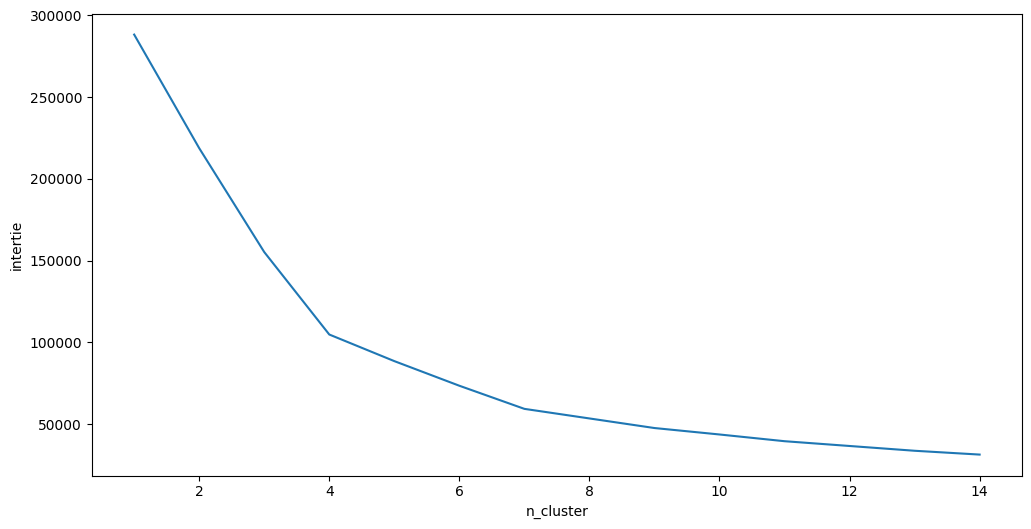

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [10]:
data_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data.index)
data = data.merge(data_cluster, left_index=True, right_index=True)

In [11]:
data

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,160,129.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,163,18.90,1
0000f46a3911fa3c0805444483337064,1,585,69.00,0
0000f6ccb0745a6a4b88665a16c9f078,1,369,25.99,0
0004aac84e0df4da2b147fca70cf8255,1,336,180.00,0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,495,1570.00,2
fffea47cd6d3cc0a88bd621562a9d061,1,310,64.89,0
ffff371b4d645b6ecea244b27531430a,1,617,89.90,0


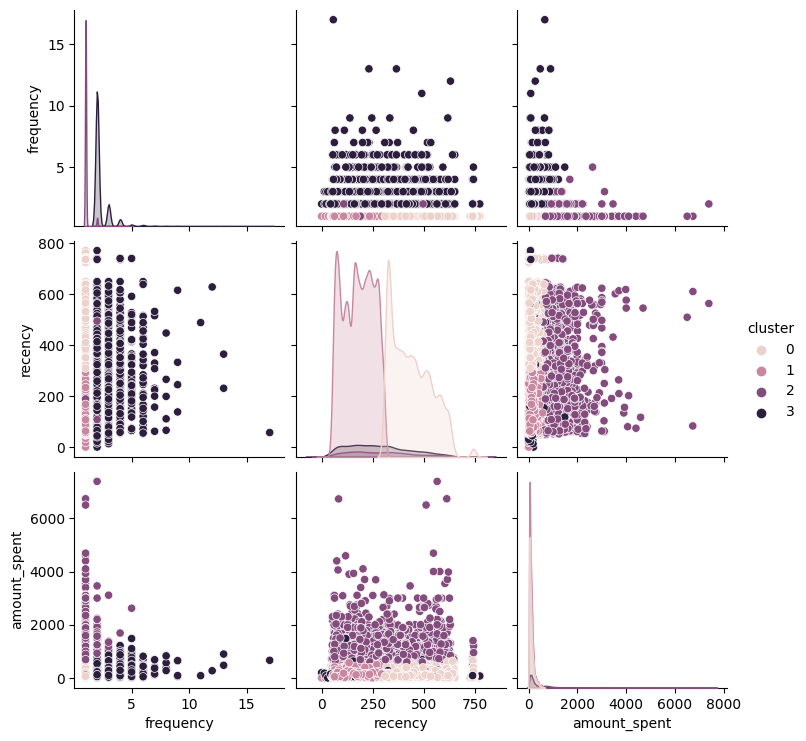

In [12]:
sns.pairplot(data, hue="cluster")

In [13]:
data_cluster_0 = data.loc[data['cluster']==0]
data_cluster_1 = data.loc[data['cluster']==1]
data_cluster_2 = data.loc[data['cluster']==2]
data_cluster_3 = data.loc[data['cluster']==3]

In [14]:
data.describe()

,frequency,recency,amount_spent,cluster
count,96096.000000,96096.000000,96096.000000,96096.00000
mean,1.080222,287.735691,131.306399,0.76000
std,0.368749,153.414676,197.726614,0.77514
min,1.000000,0.000000,0.000000,0.00000
25%,1.000000,163.000000,43.200000,0.00000
50%,1.000000,268.000000,79.990000,1.00000
75%,1.000000,397.000000,147.900000,1.00000
max,17.000000,772.000000,7388.000000,3.00000


In [15]:
data_cluster_0.describe()

,frequency,recency,amount_spent,cluster
count,37322.0,37322.000000,37322.000000,37322.0
mean,1.0,437.999464,102.426573,0.0
std,0.0,96.630561,92.018399,0.0
min,1.0,308.000000,0.000000,0.0
25%,1.0,350.000000,39.900000,0.0
50%,1.0,426.000000,74.800000,0.0
75%,1.0,512.000000,129.990000,0.0
max,1.0,772.000000,649.170000,0.0


In [16]:
data_cluster_1.describe()

,frequency,recency,amount_spent,cluster
count,50361.0,50361.000000,50361.000000,50361.0
mean,1.0,177.384702,103.135265,1.0
std,0.0,72.769983,90.313304,0.0
min,1.0,0.000000,0.000000,1.0
25%,1.0,114.000000,39.990000,1.0
50%,1.0,179.000000,78.000000,1.0
75%,1.0,239.000000,134.900000,1.0
max,1.0,308.000000,590.000000,1.0


In [17]:
data_cluster_2.describe()

,frequency,recency,amount_spent,cluster
count,2567.000000,2567.000000,2567.000000,2567.0
mean,1.044410,289.616673,1017.129801,2.0
std,0.229318,151.995978,565.396069,0.0
min,1.000000,49.000000,548.000000,2.0
25%,1.000000,163.000000,669.325000,2.0
50%,1.000000,276.000000,829.000000,2.0
75%,1.000000,395.500000,1189.950000,2.0
max,5.000000,742.000000,7388.000000,2.0


In [18]:
data_cluster_3.describe()

,frequency,recency,amount_spent,cluster
count,5846.000000,5846.000000,5846.000000,5846.0
mean,2.299179,278.227164,169.395811,3.0
std,0.793228,149.565190,140.876827,0.0
min,2.000000,0.000000,0.000000,3.0
25%,2.000000,158.000000,73.370000,3.0
50%,2.000000,260.500000,129.000000,3.0
75%,2.000000,381.000000,219.967500,3.0
max,17.000000,772.000000,1479.400000,3.0


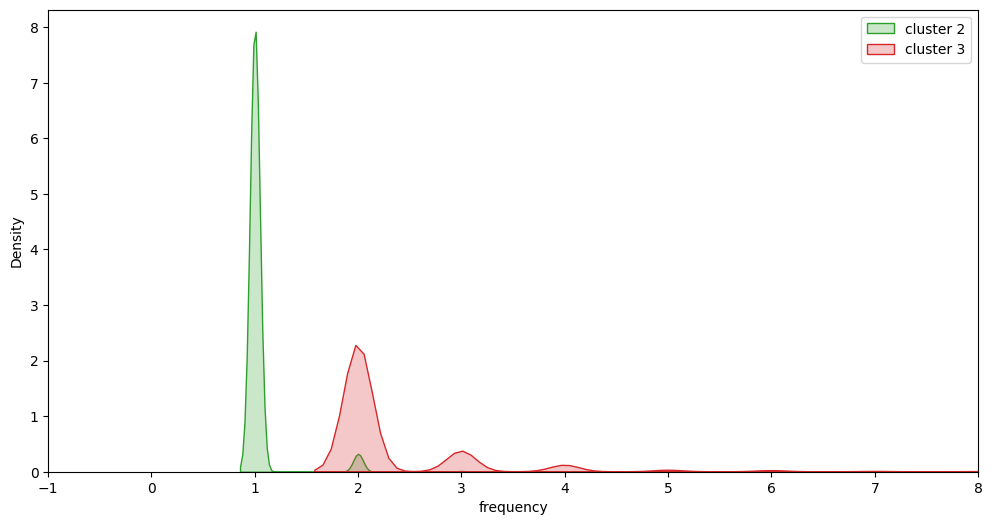

In [19]:
# Plot the distribution of frequency for each cluster
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.kdeplot(data_cluster_0['frequency'], shade=True, label='cluster 0')
sns.kdeplot(data_cluster_1['frequency'], shade=True, label='cluster 1')
sns.kdeplot(data_cluster_2['frequency'], shade=True, label='cluster 2')
sns.kdeplot(data_cluster_3['frequency'], shade=True, label='cluster 3')
plt.legend()
plt.xlim(-1, 8)
plt.show()

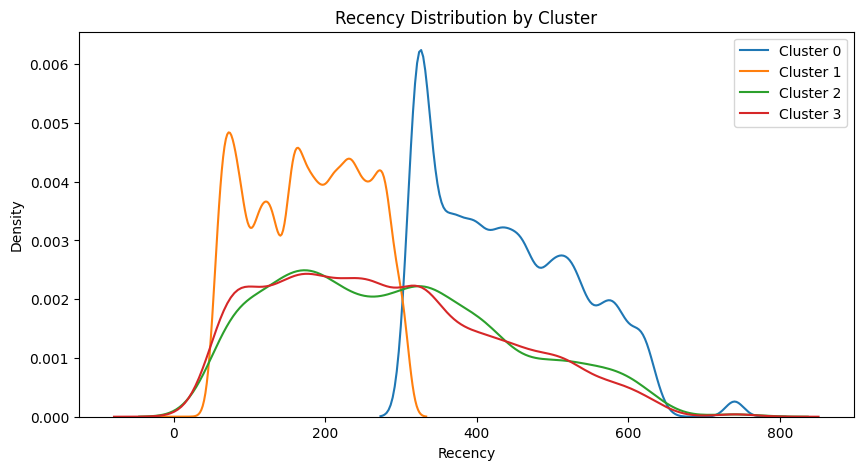

In [20]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['recency'], label='Cluster 3', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

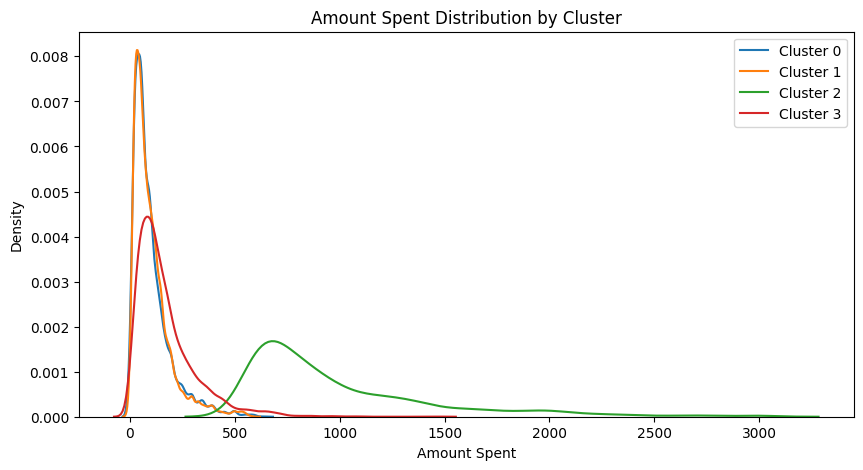

In [21]:
# Plot the distribution of amount spent under 3000 for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0.loc[data_cluster_0['amount_spent']<3000]['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1.loc[data_cluster_1['amount_spent']<3000]['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2.loc[data_cluster_2['amount_spent']<3000]['amount_spent'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3.loc[data_cluster_3['amount_spent']<3000]['amount_spent'], label='Cluster 3', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [22]:
data_scaled = data_scaled.merge(data_cluster, left_index=True, right_index=True)

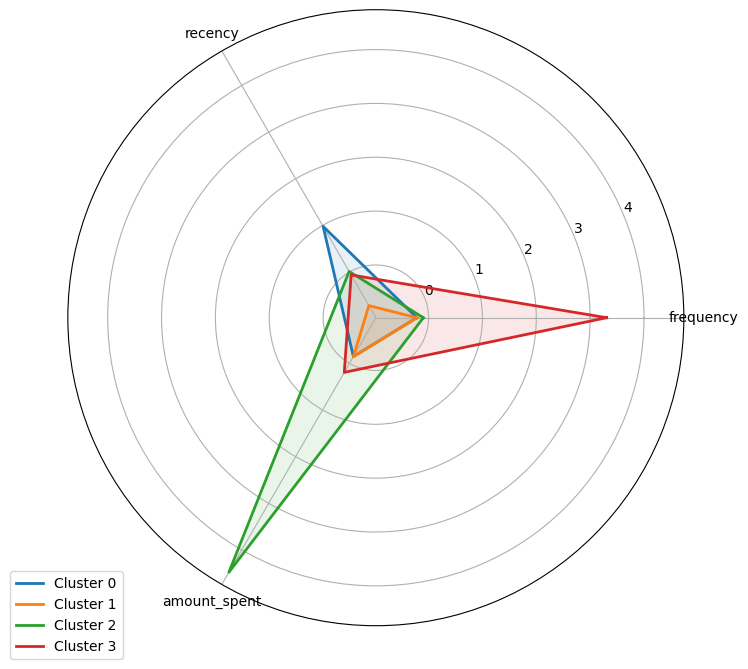

In [23]:
cluster_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
variables = ["frequency", "recency", "amount_spent"]
data_values = []
data_scaled.merge(data_cluster, left_index=True, right_index=True)

# Récupération des données pour chaque variable et chaque cluster
for cluster in range(4):
    values = []
    for variable in variables:
        values.append(data_scaled[data_scaled["cluster"] == cluster][variable].mean())
    data_values.append(values)

# Ajout de la première variable à la fin de la liste pour fermer le polygone
for i in range(4):
    data_values[i].append(data_values[i][0])

# Calcul de l'angle pour chaque variable
angles = [n / float(len(variables)) * 2 * np.pi for n in range(len(variables))]
angles.append(angles[0])

# Initialisation du plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Création du polygone pour chaque cluster
for i in range(4):
    values = data_values[i]
    ax.plot(angles, values, linewidth=2, label=cluster_names[i])
    ax.fill(angles, values, alpha=0.1)

# Ajout des labels pour chaque variable
plt.xticks(angles[:-1], variables)

# Ajout de la légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Affichage du radar chart
plt.show()

In [24]:
#Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, kmeans.labels_)

0.5672306221064116

In [26]:
#import silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(data_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

KeyboardInterrupt: 

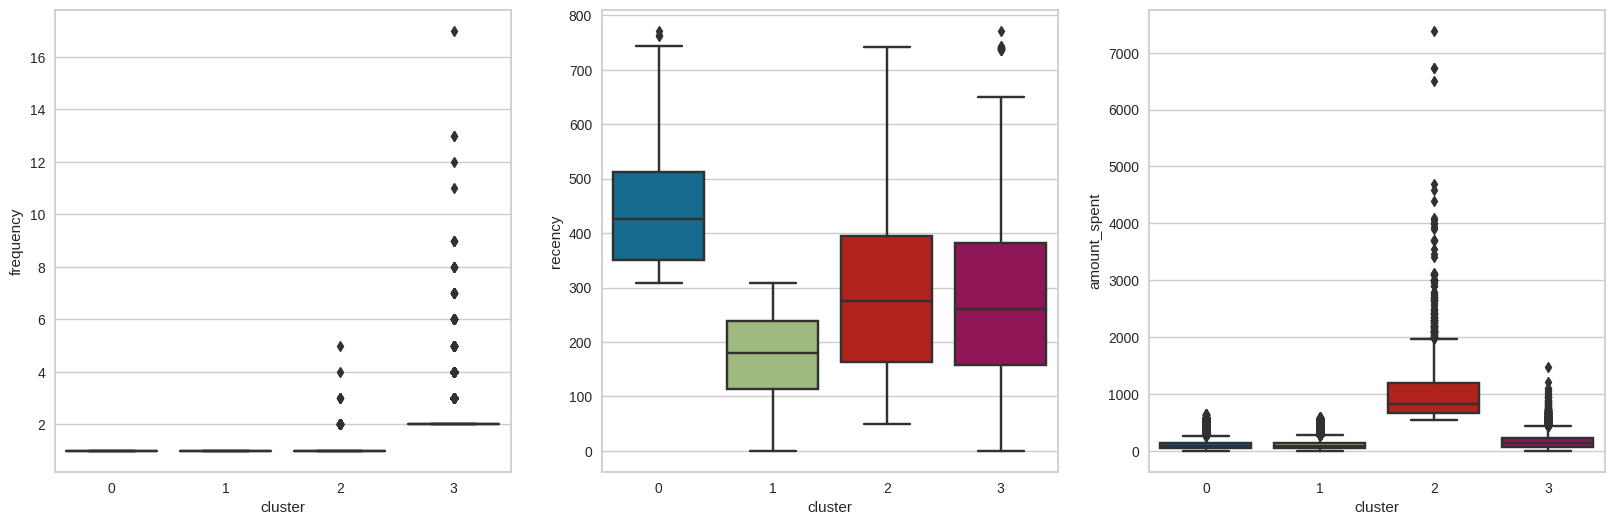

In [27]:
#boxplots for each cluster
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(x='cluster', y='frequency', data=data, ax=ax[0])
sns.boxplot(x='cluster', y='recency', data=data, ax=ax[1])
sns.boxplot(x='cluster', y='amount_spent', data=data, ax=ax[2])
plt.show()

In [28]:
data_scaled.drop(columns=['cluster'], inplace=True)

In [29]:
# Import the PCA method
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)
data_scaled_pca = pd.DataFrame(data_scaled_pca, columns=['PC1', 'PC2'], index=data_scaled.index)

NameError: name 'qqsrf' is not defined

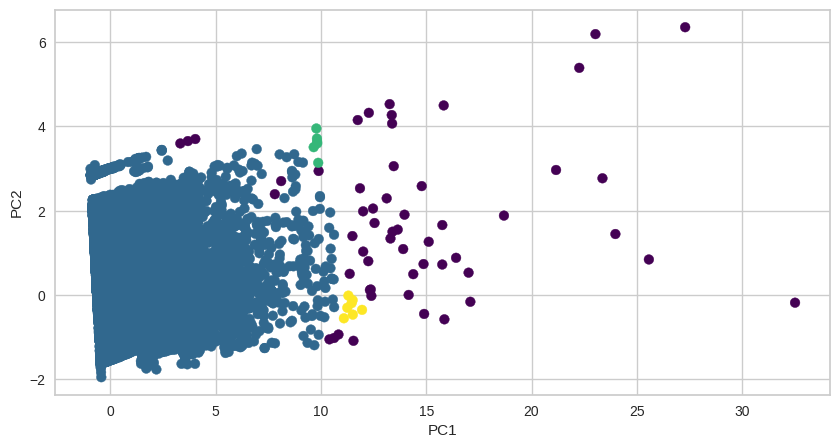

In [32]:
# dbscan on pca
from sklearn.cluster import DBSCAN
from numpy import unique

# Create a DBSCAN instance: dbscan
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit model
x = dbscan.fit_predict(data_scaled_pca)

clusters = unique(x)

# Plot the cluster assignments
plt.figure(figsize=(10,5))
plt.scatter(data_scaled_pca['PC1'], data_scaled_pca['PC2'], c=x, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [38]:
data_scaled_pca['cluster'] = x
data_scaled_pca.head()

,PC1,PC2,cluster
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.072826,-0.831923,0
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.468244,-0.881488,0
0000f46a3911fa3c0805444483337064,-0.573912,1.878815,0
0000f6ccb0745a6a4b88665a16c9f078,-0.581375,0.455168,0
0004aac84e0df4da2b147fca70cf8255,-0.013387,0.337439,0


In [39]:
data_scaled_pca['cluster'].value_counts()

 0    96028
-1       55
 2        7
 1        6
Name: cluster, dtype: int64

In [ ]:
data_scaled_pca = data_scaled_pca.merge(data_cluster, left_index=True, right_index=True)

In [ ]:
#silhouette score
silhouette_score(data_scaled_pca, dbscan.labels_)

0.4517837281689985

In [ ]:
data_2 = pd.read_csv('data_2.csv', index_col=0)

In [ ]:
data_2.head()

,frequency,recency,amount_spent,review_score
customer_unique_id,,,,
00053a61a98854899e70ed204dd4bafe,2,231,191.0,1.0
000bfa1d2f1a41876493be685390d6d3,2,383,35.0,4.5
000de6019bb59f34c099a907c151d855,2,425,229.8,2.0
000fbf0473c10fc1ab6f8d2d286ce20c,2,83,142.9,5.0
00172711b30d52eea8b313a7f2cced02,2,65,74.5,4.0


In [ ]:
#kmeans on data_2
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_2)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values